# Practice Case 04 - Home Credit Indonesia Data Science Bootcamp


## Malaysia Flight Data Oct - Nov 2018

### Author: Billy Sagala

In [2]:
#Importing Package

import pandas as pd  #datawrangling
import numpy as np #math calculation/Statistic/data operation for Array data
import matplotlib.pyplot as plt #plotting/visualization
import seaborn as sns #visualization

## Data Loading

For this practice, dataset that will be use is Malaysian Flight data on Period of Oct and Nov 2018.

In [3]:
df_raw = pd.read_csv('training_dataset.csv')
df_raw.tail()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
111063,496554,EK3367,EK,Emirates,2018-11-30 22:45:00,2018-11-30 23:45:00,Kota Bharu,KBR,MY,NaN,...,MY,NaN,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h 14m,0
111064,496555,PR3519,PR,Philippine Airlines,2018-11-30 22:45:00,2018-11-30 23:45:00,Kota Bharu,KBR,MY,NaN,...,MY,NaN,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h 14m,0
111065,496556,QR5401,QR,Qatar Airways,2018-11-30 22:45:00,2018-11-30 23:45:00,Kota Bharu,KBR,MY,NaN,...,MY,NaN,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h 14m,0
111066,496557,AK6431,AK,AirAsia,2018-11-30 23:55:00,2018-12-01 01:00:00,Kota Bharu,KBR,MY,2,...,MY,NaN,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 6m,7
111067,496596,MH3740,MH,Malaysia Airlines,2018-11-30 23:05:00,2018-11-30 23:40:00,Sibu,SBW,MY,NaN,...,MY,NaN,Bintulu Airport,Asia,NaN,Asia/Kuala_Lumpur,AT7,ATR 72,37m,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [5]:
df_raw.isnull().sum()

id                                0
number                            0
airline                           0
airline_name                      0
scheduled_departure_time          0
scheduled_arrival_time            5
departure_airport_city            0
departure_airport_code            0
departure_airport_country         0
departure_airport_gate        44209
departure_airport_name            0
departure_airport_region          0
departure_airport_terminal    41340
departure_airport_timezone        0
arrival_airport_city              0
arrival_airport_code              0
arrival_airport_country           0
arrival_airport_gate          98981
arrival_airport_name              0
arrival_airport_region            0
arrival_airport_terminal      58018
arrival_airport_timezone          0
flight_equipment_iata            19
flight_equipment_name            19
flight_duration                   3
delay                             0
dtype: int64

In [6]:
#removing duplicates

df_raw.duplicated(subset=None, keep='first')

dup_row_df_raw = df_raw[df_raw.duplicated(subset=None, keep='first')]
df_raw[df_raw.duplicated(subset=None, keep='first')==True]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay


The row have no duplicates.

In [7]:

print("Below is description of FLight delay")
print(df_raw.delay.describe())

Below is description of FLight delay
count    111068.000000
mean         11.540210
std          26.806913
min           0.000000
25%           0.000000
50%           1.000000
75%          13.000000
max         978.000000
Name: delay, dtype: float64


In [8]:
#Time Grouping

import time
from time import mktime
from datetime import datetime as dt

In [9]:
df_raw['scheduled_departure_time']=  pd.to_datetime(df_raw['scheduled_departure_time'])
df_raw['scheduled_arrival_time']=  pd.to_datetime(df_raw['scheduled_arrival_time'])

In [10]:
df_raw['dpt_date'] = [d.date() for d in df_raw['scheduled_departure_time']]
df_raw['dpt_time'] = [d.time() for d in df_raw['scheduled_departure_time']]


In [11]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
   

In [12]:
df_raw['dpt_hour'] = pd.to_datetime(df_raw['dpt_time'], format='%H:%M:%S').dt.hour

In [13]:
df_raw['dpt_time_1']= df_raw.dpt_hour.apply(f)

## Travel Recommendation

### Best Airline

In [14]:
airline_delay = df_raw.groupby('airline_name').delay.agg(['mean'])
airline_delay = airline_delay.sort_values(by='mean',ascending=True)
airline_delay_head = airline_delay.head(10)


In [15]:
airline_delay_head

,mean
airline_name,
YTO Cargo,0.000000
Hong Kong Airlines,0.000000
Silk Way West,0.000000
Guangxi Beibu Gulf Airlines,0.000000
Firefly,0.000000
TAP Portugal,1.485714
Raya Airways,3.097744
Jeju Air,3.657143
United Airlines,5.435374


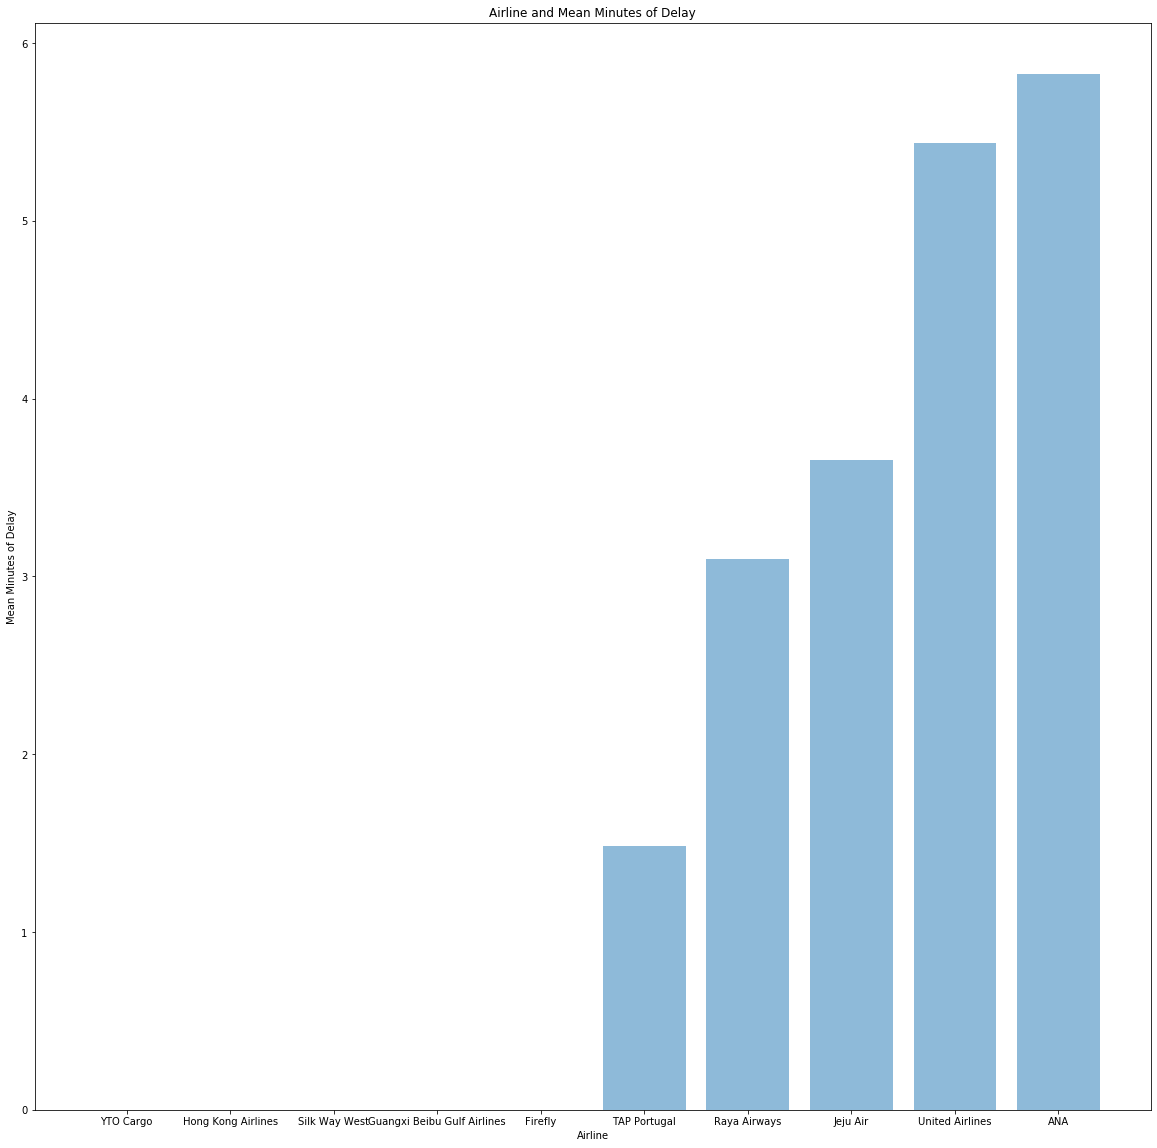

In [16]:
#Top 10 Airline with Least mean minutes of Delay 
x = airline_delay_head.index
y = airline_delay_head['mean']

plt.figure(figsize=(20,20))
plt.bar(x, y, align='center', alpha=0.5)
plt.title('Airline and Mean Minutes of Delay')
plt.xlabel('Airline')
plt.ylabel('Mean Minutes of Delay')
plt.show()


The airline with no delay from the record is: __YTO Cargo, Hong Kong Airlines, Silk Way West, Guangxi Beibu Gulf Airlines, Firefly__.

## Best Time

In [17]:
airline_delay_time = df_raw.groupby('dpt_time_1').delay.agg(['mean'])
airline_delay_time = airline_delay_time.sort_values(by='mean',ascending=True)
airline_delay_time


,mean
dpt_time_1,
Night,4.493975
Late Night,9.726910
Early Morning,11.156183
Eve,13.581731
Noon,14.847002
Morning,15.246440


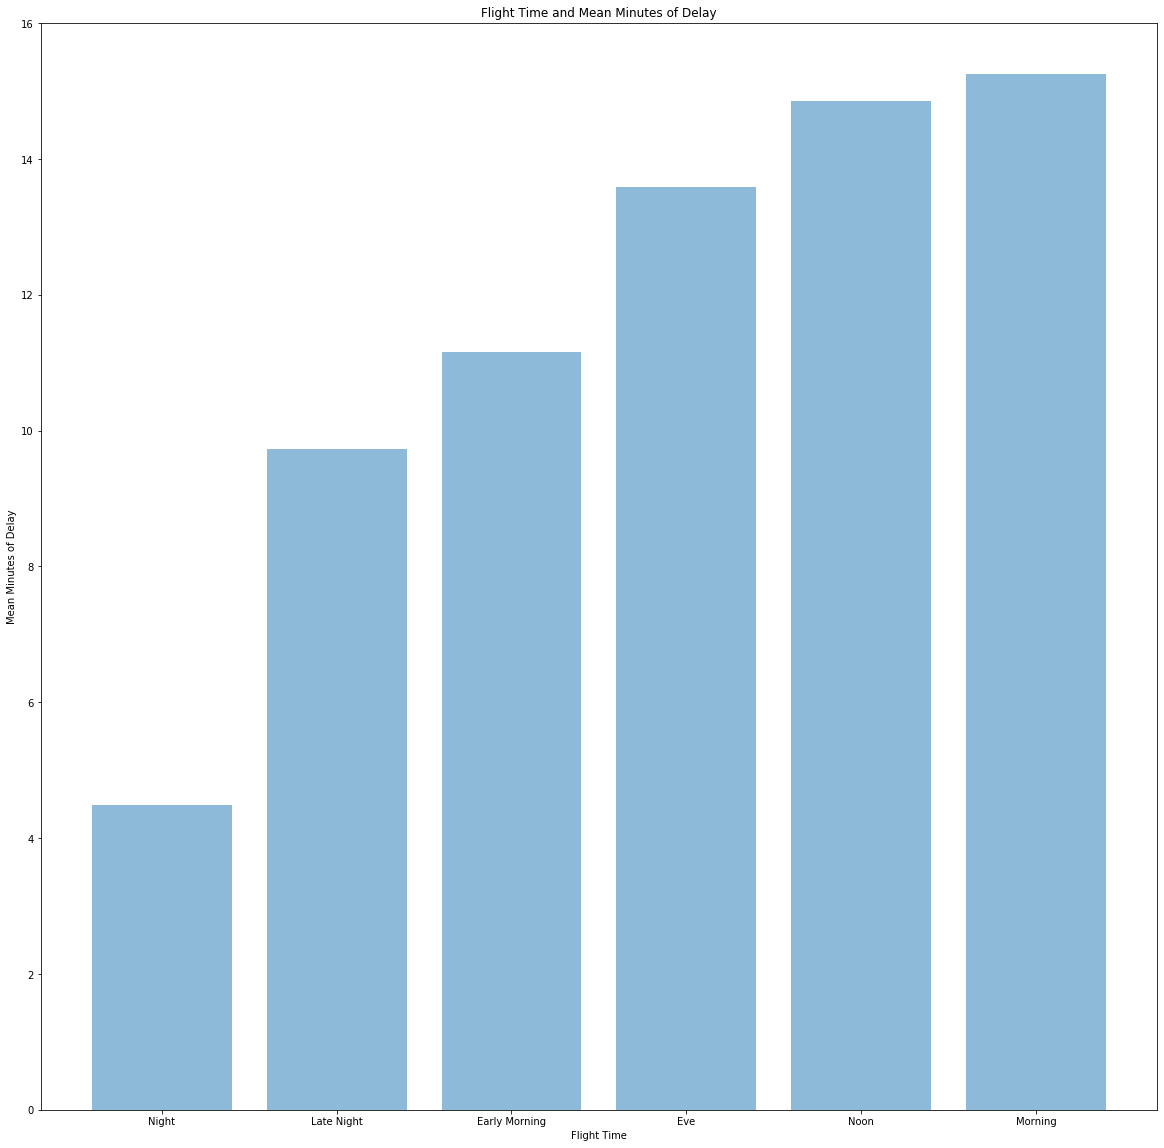

In [18]:
#Top 10 Airline with Least mean minutes of Delay 
x = airline_delay_time.index
y = airline_delay_time['mean']

plt.figure(figsize=(20,20))
plt.bar(x, y, align='center', alpha=0.5)
plt.title('Flight Time and Mean Minutes of Delay')
plt.xlabel('Flight Time')
plt.ylabel('Mean Minutes of Delay')
plt.show()


Based on delay minutes mean, it is recommended to take flight at __night__, between 8 - 12 PM.

## Load Test Data

In [19]:
df_test = pd.read_csv('test_dataset.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41557 entries, 0 to 41556
Data columns (total 26 columns):
id                            41557 non-null int64
number                        41557 non-null object
airline                       41557 non-null object
airline_name                  41557 non-null object
scheduled_departure_time      41557 non-null object
scheduled_arrival_time        41555 non-null object
departure_airport_city        41557 non-null object
departure_airport_code        41557 non-null object
departure_airport_country     41557 non-null object
departure_airport_gate        25147 non-null object
departure_airport_name        41557 non-null object
departure_airport_region      41557 non-null object
departure_airport_terminal    26309 non-null object
departure_airport_timezone    41557 non-null object
arrival_airport_city          41557 non-null object
arrival_airport_code          41557 non-null object
arrival_airport_country       41557 non-null object
arrival_

In [20]:
#adding time grouping
df_test['scheduled_departure_time']=  pd.to_datetime(df_test['scheduled_departure_time'])
df_test['scheduled_arrival_time']=  pd.to_datetime(df_test['scheduled_arrival_time'])
df_test['dpt_date'] = [d.date() for d in df_test['scheduled_departure_time']]
df_test['dpt_time'] = [d.time() for d in df_test['scheduled_departure_time']]

In [21]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


In [22]:
df_test['dpt_hour'] = pd.to_datetime(df_test['dpt_time'], format='%H:%M:%S').dt.hour
df_test['dpt_time_1']= df_test.dpt_hour.apply(f)

## Feature Engineering Train Data

In [23]:
df_prepare = df_raw[['airline', 'departure_airport_code','arrival_airport_code','flight_equipment_iata',\
                     'dpt_time_1','delay']]
target = df_prepare['delay']
temp = df_prepare.drop(['delay'], axis = 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder

dataset_dummies = temp.select_dtypes(exclude=['int','int64','float64'])
dataset_int = temp.select_dtypes(include=['int','int64','float64'])

In [25]:
dataset_dummies_2 = pd.get_dummies(dataset_dummies, drop_first = True)

In [38]:
df_model = pd.concat([dataset_int,dataset_dummies_2,target], axis = 1)

In [39]:
df_model.dropna()

,airline_5J,airline_6E,airline_7C*,airline_7L*,airline_8L,airline_8M,airline_9C,airline_9W,airline_AA,airline_AC,...,flight_equipment_iata_AT4,flight_equipment_iata_AT7,flight_equipment_iata_ATR,flight_equipment_iata_DHT,dpt_time_1_Eve,dpt_time_1_Late Night,dpt_time_1_Morning,dpt_time_1_Night,dpt_time_1_Noon,delay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Engineering Test Data

In [30]:
df_prepare1 = df_test[['airline', 'departure_airport_code','arrival_airport_code','flight_equipment_iata',\
                     'dpt_time_1','delay']]
target1 = df_prepare1['delay']
temp1 = df_prepare1.drop(['delay'], axis = 1)

In [31]:
dataset_dummies1 = temp1.select_dtypes(exclude=['int','int64','float64'])
dataset_int1 = temp1.select_dtypes(include=['int','int64','float64'])

In [45]:
dataset_dummies1_2 = pd.get_dummies(dataset_dummies1, drop_first = True)
df_model1 = pd.concat([dataset_int1,dataset_dummies1_2,target], axis = 1)

In [49]:
df_model1.dropna()

,airline_5J,airline_6E,airline_7C*,airline_7L*,airline_8L,airline_8M,airline_9C,airline_9W,airline_AA,airline_AC,...,flight_equipment_iata_7M8,flight_equipment_iata_AT7,flight_equipment_iata_ATR,flight_equipment_iata_DHT,dpt_time_1_Eve,dpt_time_1_Late Night,dpt_time_1_Morning,dpt_time_1_Night,dpt_time_1_Noon,delay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


## Model to Estimate Delay duration with Linear Regression

In [64]:
#using multivariate regression

X = df_model.iloc[1,151,267,313]
y = df_model.iloc[:,len(df_model.columns)-1]
X_test = df_model1.iloc[1,151,267,313]
y_test = df_model1.iloc[:,len(df_model1.columns)-1]

IndexingError: Too many indexers

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
Mult_regression = LinearRegression()
Mult_regression.fit(X,y)
y_pred_train = Mult_regression.predict(X)
y_pred_test = Mult_regression.predict(X_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [58]:
df_model.iloc[:,len(df_model.columns)-1]

0          2
1          8
2          8
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        25
12         7
13         4
14         0
15         0
16        25
17         0
18         1
19        12
20         0
21         0
22         0
23         5
24         0
25         4
26         0
27        16
28         2
29        10
          ..
111038     0
111039     0
111040     0
111041     0
111042     0
111043     0
111044     0
111045     0
111046     0
111047     0
111048     0
111049     0
111050     0
111051     0
111052     0
111053     0
111054     0
111055     0
111056     7
111057     1
111058     0
111059     0
111060     0
111061     0
111062     0
111063     0
111064     0
111065     0
111066     7
111067     0
Name: delay, Length: 111068, dtype: int64

In [ ]:
df_model